# PROJECT-2 : Ratings of GUVI Courses


The following project is about Guvi Courses. The dataset for this project contains information
about Guvi courses in various categories, including course title, URL, price, number of
subscribers, number of reviews, number of lectures, course level, rating, content duration,
published timestamp, and subject. With this dataset, we can track the performance of courses
and uncover opportunities to generate revenue.

1. course_title : The title of the Guvi course. (String)
2. url : The URL of the Guvi course. (String)
3. price : The price of the Guvi course. (Float)
4. num_subscribers :The number of subscribers for the Guvi course. (Integer)
5. num_reviews : The number of reviews for the Guvi course.(Integer)
6. num_lectures : The number of lectures in the Guvi course.(Integer)
7. level : The level of the Guvi course. (String)
8. Rating : The rating of the Guvi course. (Float)
9. content_duration : The content duration of the Guvi course.(Float)
10. published_timestamp : The timestamp of when the Guvi course was published. (Datetime)
11. subject : The subject of the Guvi course. (String)

Design a regression model to predict the ratings given by the learners to the course.

### Importing Libraries and Dataset

Importing normal libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

Importing classifier and ML-related libraries

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
df = pd.read_csv(r'C:\Users\aasth\OneDrive\Desktop\Guvi_Projects_Module_21\dataset\3.1-data-sheet-guvi-courses.csv')
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments


### Data Preprocessing

In [4]:
df.isnull().sum()

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

In [5]:
df.dtypes

course_id              float64
course_title            object
url                     object
price                  float64
num_subscribers        float64
num_reviews            float64
num_lectures           float64
level                   object
Rating                 float64
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3676.0,675753.495103,343130.440299,8324.0,407474.00,687692.00,960814.00,1282064.0
price,3676.0,66.115343,61.056073,0.0,20.00,45.00,95.00,200.0
num_subscribers,3676.0,3199.260881,9486.582966,0.0,112.00,912.50,2558.00,268923.0
num_reviews,3676.0,156.309848,935.674518,0.0,4.00,18.00,67.00,27445.0
num_lectures,3676.0,40.129761,50.398507,0.0,15.00,25.00,46.00,779.0
Rating,3676.0,0.610868,0.334287,0.0,0.28,0.76,0.93,1.0
content_duration,3676.0,4.096137,6.054948,0.0,1.00,2.00,4.50,78.5


In [7]:
# Find no. of unique values
df.nunique()

course_id              3672
course_title           3663
url                    3672
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
Rating                  101
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64

In [8]:
# Finding Numerical and Categorical columns
def find_num_cat_columns(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    return numerical_cols, categorical_cols

In [9]:
numerical_cols , categorical_cols = find_num_cat_columns(df)
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'Rating', 'content_duration']
Categorical columns: ['course_title', 'url', 'level', 'published_timestamp', 'subject']


##### Removing unwanted columns to predict Rating

In [10]:
for i in range(len(df.columns)):
    print(df.columns[i]+" : "+str(df[df.columns[i]].value_counts().to_list()))


course_id : [2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

We can see that the columns : "course_id", "course_title" , "url" and "published_timestamp" have very less value_counts().If a column has very low variability, meaning that one or a few values dominate the entire column, it might not provide much useful information. In such cases, we might decide to drop that column.

In [11]:
df.drop(['course_id','course_title','url','published_timestamp'],axis=1,inplace=True)

In [12]:
df.columns

Index(['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'Rating', 'content_duration', 'subject'],
      dtype='object')

##### Handling Null Values

In [14]:
def find_outliers(df,col):
    for i in col:
        plt.figure(figsize=(5, 3))  
        sns.boxplot(data=df, x=i)
        plt.title(f'Boxplot of {i}')
        plt.xlabel(i)
        plt.show()

In [15]:
numerical_cols , categorical_cols = find_num_cat_columns(df)
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'Rating', 'content_duration']
Categorical columns: ['level', 'subject']


###### Categorical Data

In [16]:
df['level'].fillna(df['level'].mode().iloc[0], inplace=True)
df['subject'].fillna(df['subject'].mode().iloc[0], inplace=True)

###### Numerical Data

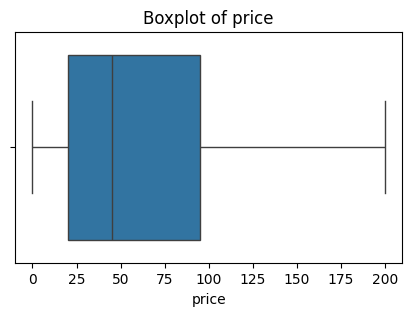

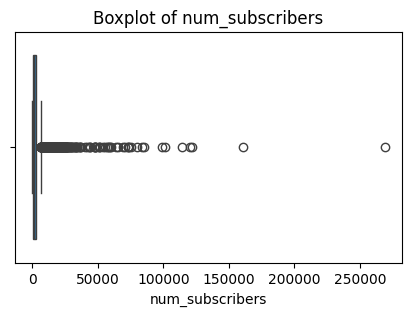

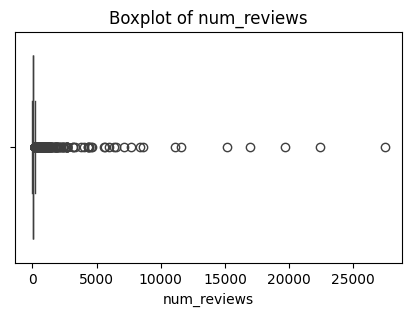

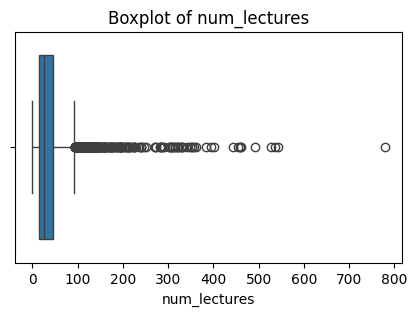

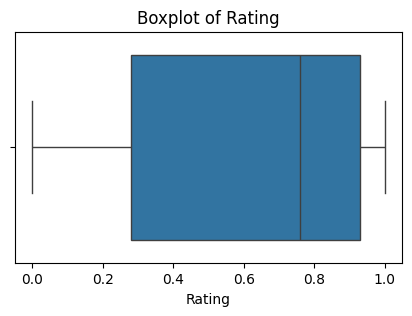

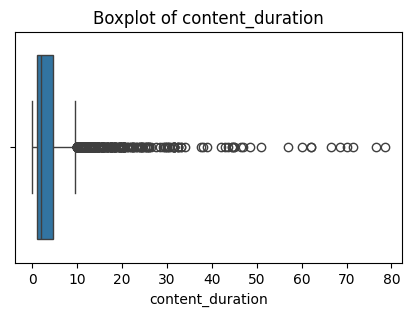

In [17]:
find_outliers(df,numerical_cols)

Filling Null values with median which have outliers

In [18]:
df['num_reviews'].fillna(df['num_reviews'].median(), inplace=True)
df['num_subscribers'].fillna(df['num_subscribers'].median(), inplace=True)
df['num_lectures'].fillna(df['num_lectures'].median(), inplace=True)
df['content_duration'].fillna(df['content_duration'].median(), inplace=True)

Filling Null Values with Mean which don't have outliers

In [19]:
df['price'].fillna(df['price'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [20]:
df.isnull().sum()

price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
Rating              0
content_duration    0
subject             0
dtype: int64

##### Encoding Categorical Data

In [21]:
df1 = df.copy()

In [22]:
numerical_cols , categorical_cols = find_num_cat_columns(df)
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'Rating', 'content_duration']
Categorical columns: ['level', 'subject']


Using Label Encoder for column "level"

In [23]:
df1['level_encoded'] = LabelEncoder().fit_transform(df1[['level']])

Using Ordinal Encoder for column "subject"

In [24]:
df1['subject_encoded'] = OrdinalEncoder().fit_transform(df1[['subject']])

In [25]:
df1

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,level_encoded,subject_encoded
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Subject: Web Development,1,3.0
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Subject: Web Development,2,3.0
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Subject: Web Development,1,3.0
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Subject: Web Development,0,3.0
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Subject: Web Development,1,3.0
...,...,...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments,0,2.0
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments,1,2.0
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments,0,2.0
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments,1,2.0


In [26]:
df1.dtypes

price               float64
num_subscribers     float64
num_reviews         float64
num_lectures        float64
level                object
Rating              float64
content_duration    float64
subject              object
level_encoded         int32
subject_encoded     float64
dtype: object

##### Handling Skewness

In [27]:
df2 = df1.copy()
df2

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,level_encoded,subject_encoded
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Subject: Web Development,1,3.0
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Subject: Web Development,2,3.0
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Subject: Web Development,1,3.0
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Subject: Web Development,0,3.0
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Subject: Web Development,1,3.0
...,...,...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments,0,2.0
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments,1,2.0
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments,0,2.0
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments,1,2.0


In [28]:
numerical_cols , categorical_cols = find_num_cat_columns(df)
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'Rating', 'content_duration']
Categorical columns: ['level', 'subject']


In [29]:
def plot(df, column):
    plt.subplot(1,3,1)
    plt.title(f'Hist & Violin Plot : {column}')
    sns.histplot(data=df, x=column, kde=True, bins=50)

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.legend(labels=["Skewness: %.2f"%(df[column].skew())])
    plt.show()

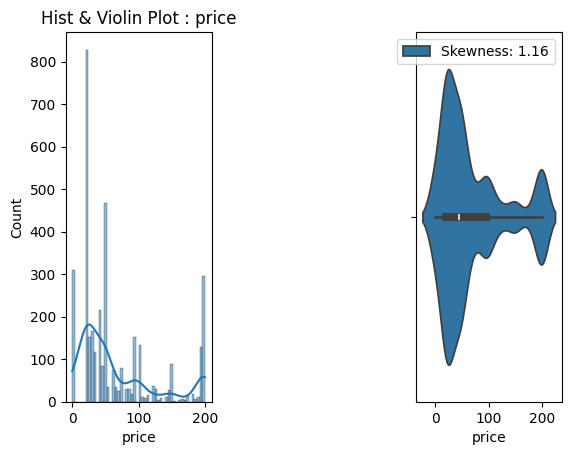

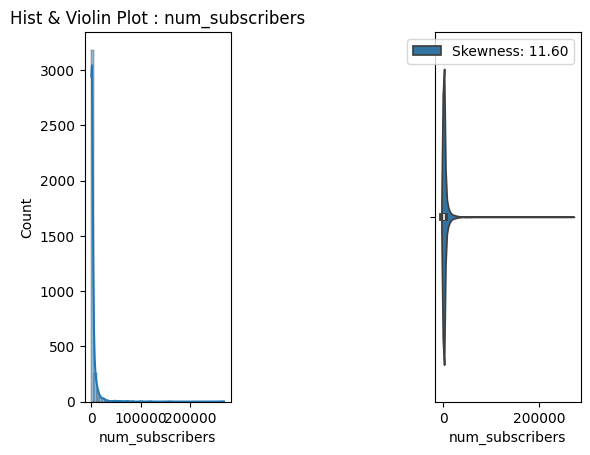

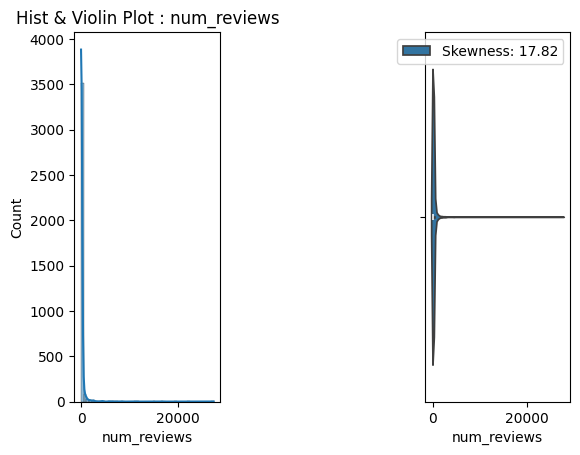

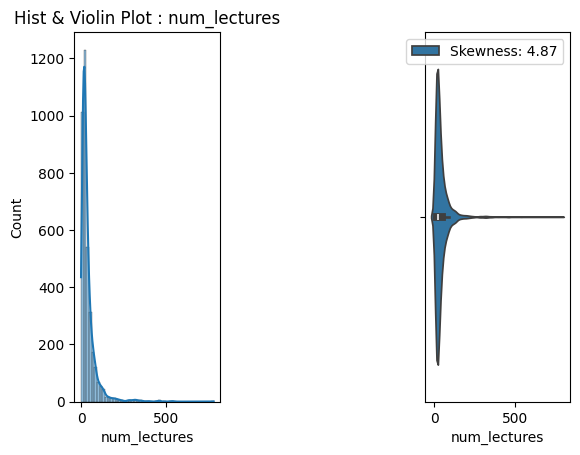

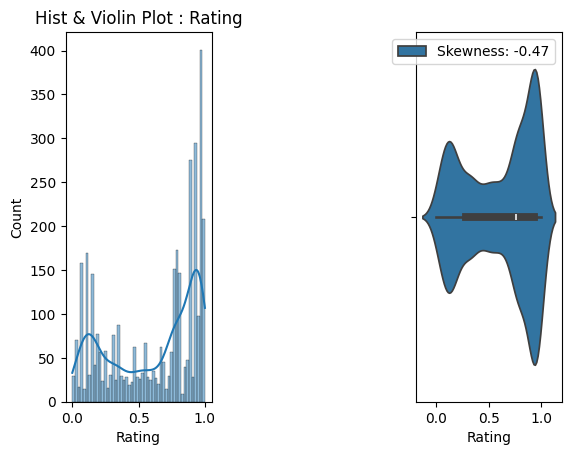

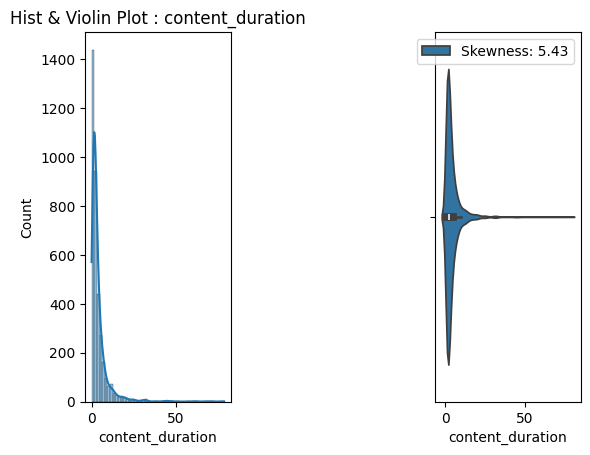

In [30]:
for col in numerical_cols:
    plot(df2, col)

Using Log Transformation, removing the skewness

In [31]:
def add_log_transform(df,col):
    return np.log(df[df[col]>0][col])

Skewness values between -0.5 and 0.5 is considered to be roughly symmetric distribution, hence "rating" and "subject_encoded" columns can be ignored

In [32]:
df2['price_log'] = add_log_transform(df2,'price')
df2['num_subscribers_log'] = add_log_transform(df2,'num_subscribers')
df2['num_reviews_log'] = add_log_transform(df2,'num_reviews')
df2['num_lectures_log'] = add_log_transform(df2,'num_lectures')
df2['content_duration_log'] = add_log_transform(df2,'content_duration')
df2['level_log'] = add_log_transform(df2,'level_encoded')
df2

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,level_encoded,subject_encoded,price_log,num_subscribers_log,num_reviews_log,num_lectures_log,content_duration_log,level_log
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Subject: Web Development,1,3.0,NaN,12.502180,9.062884,3.806662,2.351375,0.000000
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Subject: Web Development,2,3.0,NaN,11.989340,5.631212,3.295837,1.252763,0.693147
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Subject: Web Development,1,3.0,5.298317,11.708361,10.219939,5.834811,3.761200,0.000000
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Subject: Web Development,0,3.0,NaN,11.697669,8.686767,3.401197,1.098612,NaN
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Subject: Web Development,1,3.0,5.298317,11.648435,10.017352,5.717028,3.417727,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments,0,2.0,2.995732,NaN,NaN,3.135494,0.405465,NaN
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments,1,2.0,4.828314,NaN,NaN,1.945910,-0.456758,0.000000
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments,0,2.0,2.995732,NaN,NaN,1.791759,-0.628609,NaN
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments,1,2.0,3.555348,NaN,NaN,2.564949,-0.660357,0.000000


In [33]:
# Dropping off the columns which are skewed
df3 = df2.copy()
df3.drop(['price','num_subscribers','num_reviews','num_lectures','content_duration','level','level_encoded','subject'],axis=1,inplace=True)
df3

,Rating,subject_encoded,price_log,num_subscribers_log,num_reviews_log,num_lectures_log,content_duration_log,level_log
0,0.82,3.0,NaN,12.502180,9.062884,3.806662,2.351375,0.000000
1,0.69,3.0,NaN,11.989340,5.631212,3.295837,1.252763,0.693147
2,0.89,3.0,5.298317,11.708361,10.219939,5.834811,3.761200,0.000000
3,0.78,3.0,NaN,11.697669,8.686767,3.401197,1.098612,NaN
4,0.55,3.0,5.298317,11.648435,10.017352,5.717028,3.417727,0.000000
...,...,...,...,...,...,...,...,...
3675,0.31,2.0,2.995732,NaN,NaN,3.135494,0.405465,NaN
3676,0.06,2.0,4.828314,NaN,NaN,1.945910,-0.456758,0.000000
3677,0.08,2.0,2.995732,NaN,NaN,1.791759,-0.628609,NaN
3678,0.78,2.0,3.555348,NaN,NaN,2.564949,-0.660357,0.000000


In [34]:
numerical_cols,categorical_cols = find_num_cat_columns(df3)
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['Rating', 'subject_encoded', 'price_log', 'num_subscribers_log', 'num_reviews_log', 'num_lectures_log', 'content_duration_log', 'level_log']
Categorical columns: []


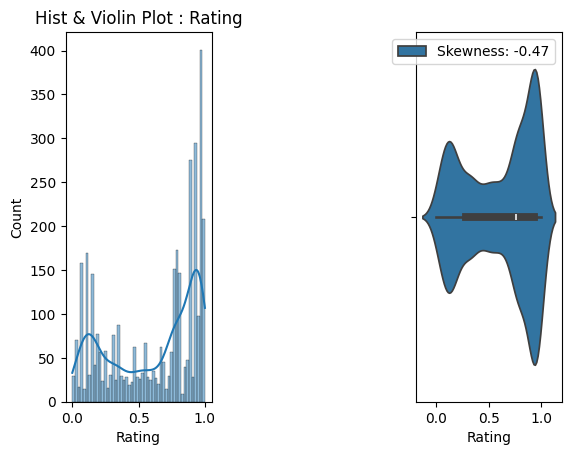

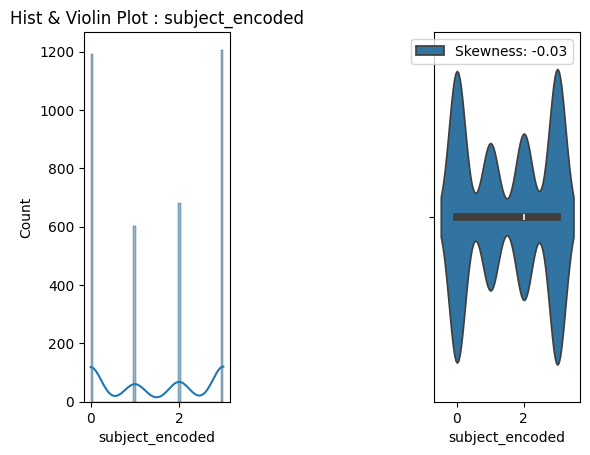

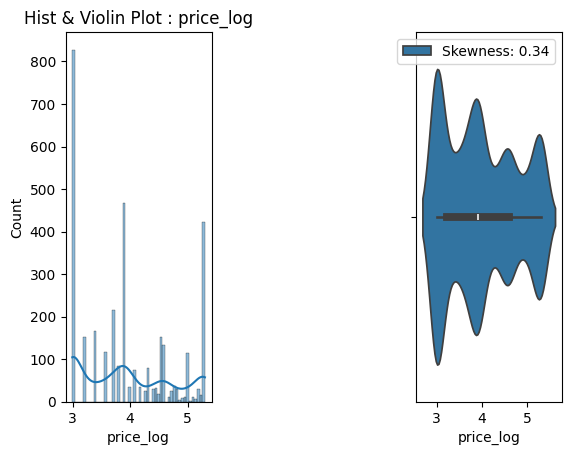

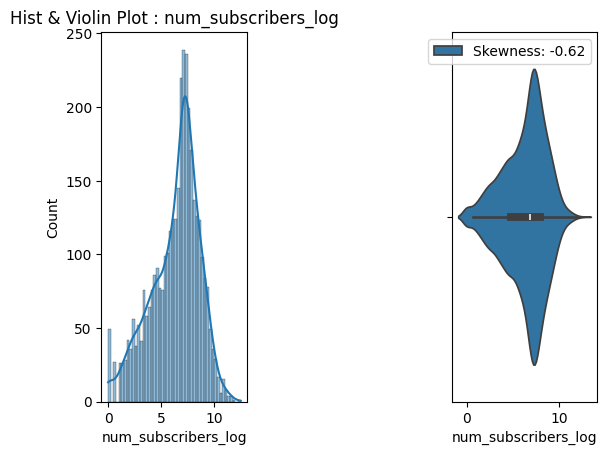

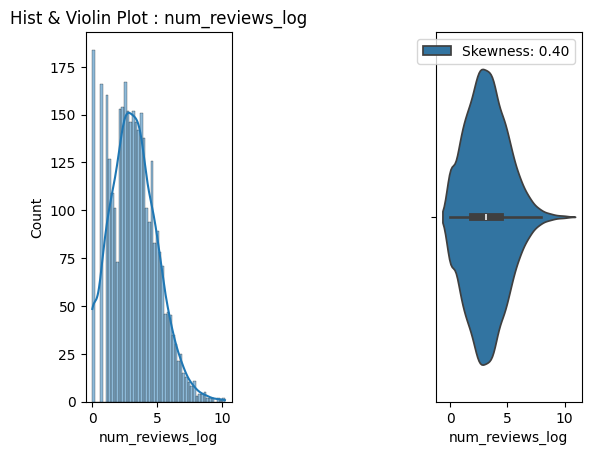

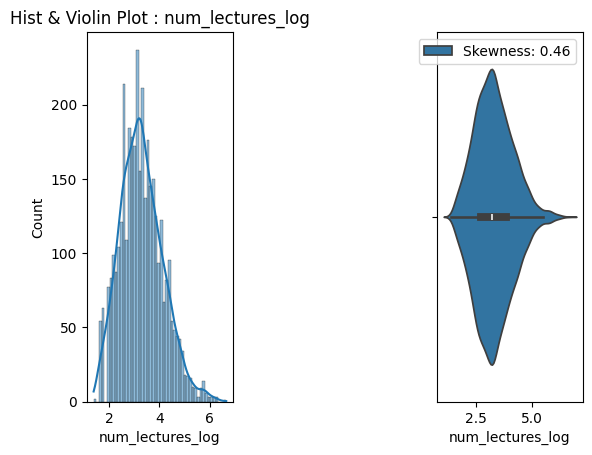

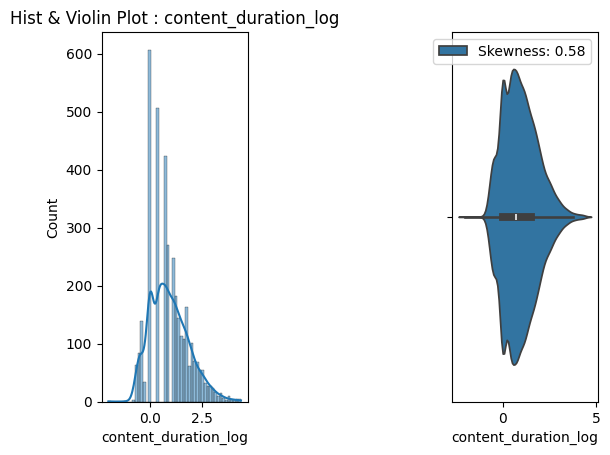

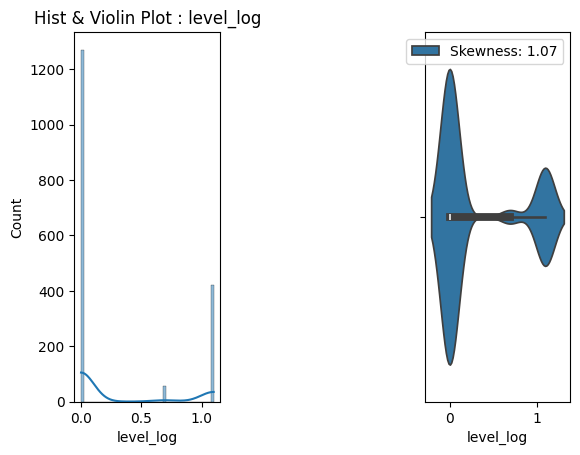

In [35]:
for col in numerical_cols:
    plot(df3, col)

##### Handling the outliers

In [36]:
df4 = df3.copy()

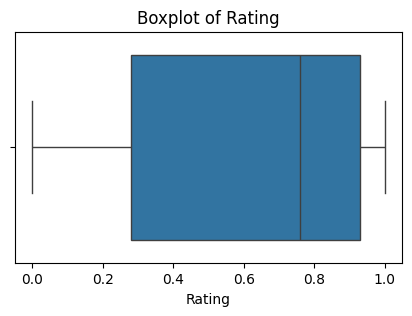

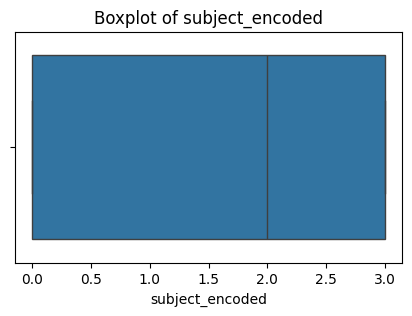

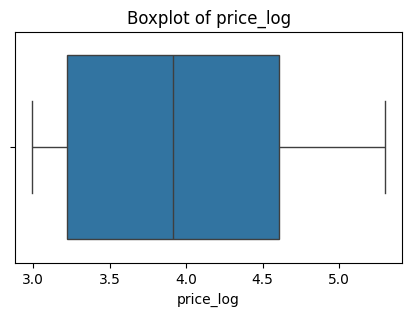

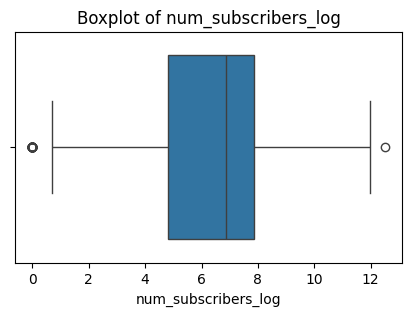

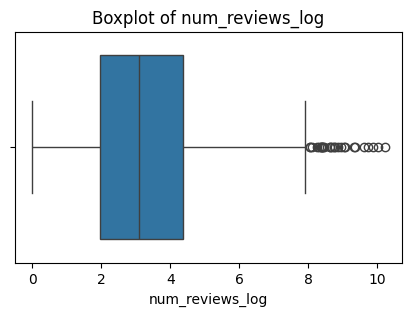

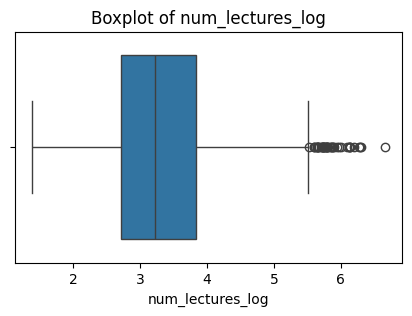

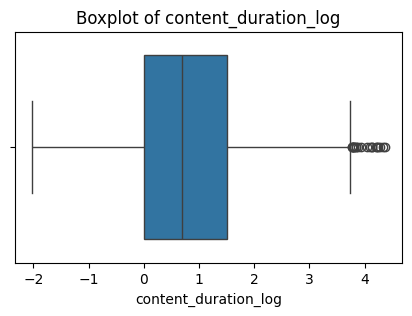

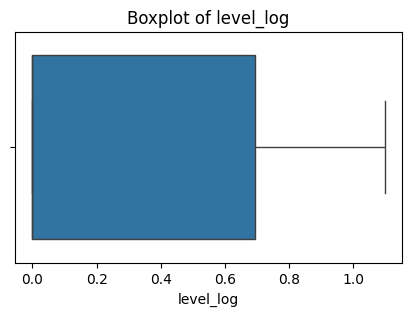

In [37]:
find_outliers(df4,numerical_cols)

We find that the columns "content_duration_log" , "num_lectures_log" , "num_reviews_log" , "num_subscribers_log" have outliers, so we need to handle them

In [38]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

Using IQR method to hanle outliers

In [39]:
outlier(df4,'num_subscribers_log')
outlier(df4,'num_reviews_log')
outlier(df4,'num_lectures_log')
outlier(df4,'content_duration_log')
df4

,Rating,subject_encoded,price_log,num_subscribers_log,num_reviews_log,num_lectures_log,content_duration_log,level_log
0,0.82,3.0,NaN,12.435904,7.972907,3.806662,2.351375,0.000000
1,0.69,3.0,NaN,11.989340,5.631212,3.295837,1.252763,0.693147
2,0.89,3.0,5.298317,11.708361,7.972907,5.509528,3.760193,0.000000
3,0.78,3.0,NaN,11.697669,7.972907,3.401197,1.098612,NaN
4,0.55,3.0,5.298317,11.648435,7.972907,5.509528,3.417727,0.000000
...,...,...,...,...,...,...,...,...
3675,0.31,2.0,2.995732,NaN,NaN,3.135494,0.405465,NaN
3676,0.06,2.0,4.828314,NaN,NaN,1.945910,-0.456758,0.000000
3677,0.08,2.0,2.995732,NaN,NaN,1.791759,-0.628609,NaN
3678,0.78,2.0,3.555348,NaN,NaN,2.564949,-0.660357,0.000000


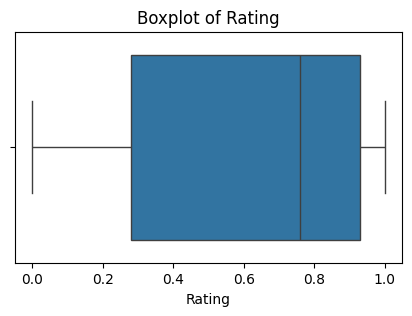

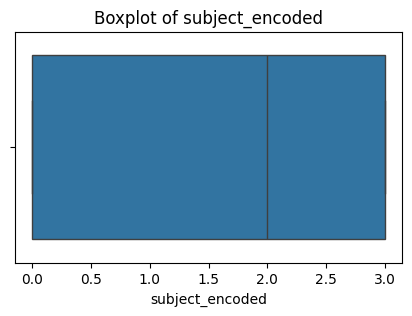

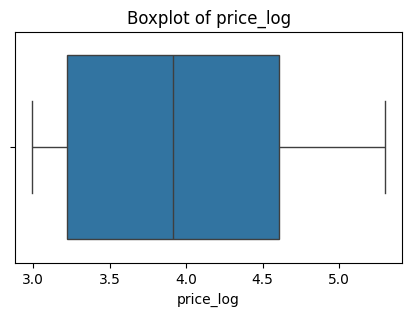

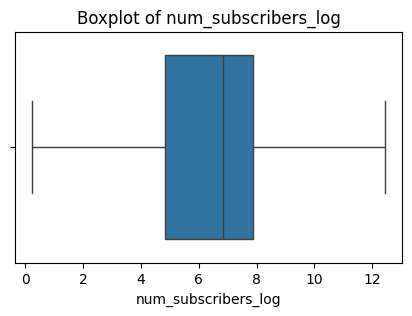

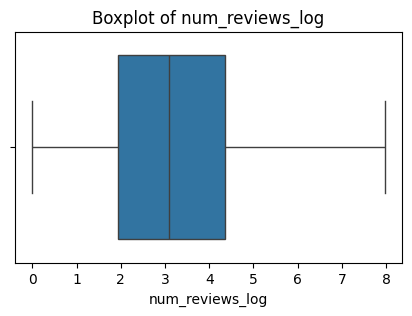

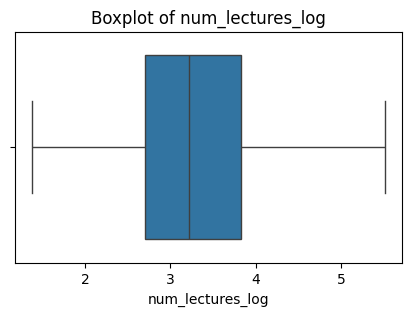

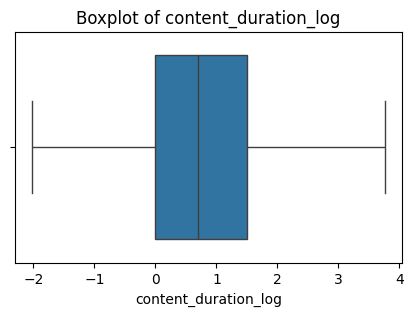

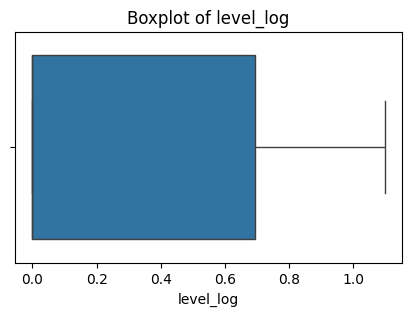

In [40]:
find_outliers(df4,numerical_cols)

In [41]:
df4.isnull().sum()

Rating                     0
subject_encoded            0
price_log                311
num_subscribers_log       65
num_reviews_log          284
num_lectures_log           1
content_duration_log       1
level_log               1929
dtype: int64

In [42]:
df4['price_log'].fillna(df4['price_log'].mean(), inplace=True)
df4['num_subscribers_log'].fillna(df4['num_subscribers_log'].mean(), inplace=True)
df4['num_reviews_log'].fillna(df4['num_reviews_log'].mean(), inplace=True)
df4['num_lectures_log'].fillna(df4['num_lectures_log'].mean(), inplace=True)
df4['content_duration_log'].fillna(df4['content_duration_log'].mean(), inplace=True)
df4['level_log'].fillna(df4['level_log'].mean(), inplace=True)

In [43]:
df4.isnull().sum()

Rating                  0
subject_encoded         0
price_log               0
num_subscribers_log     0
num_reviews_log         0
num_lectures_log        0
content_duration_log    0
level_log               0
dtype: int64

##### Finding the Correlation using Heatmap

<Axes: >

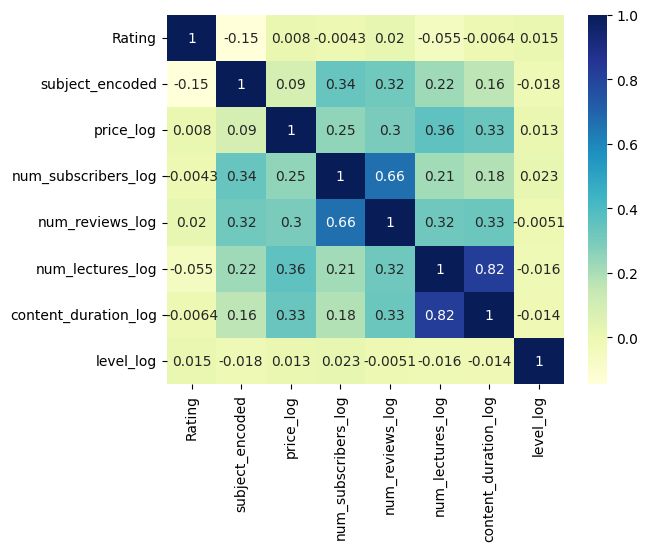

In [44]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correlation value >= 0.7 (absolute value), drop the columns.
df_heatmap = df4.corr()
sns.heatmap(df_heatmap, cmap="YlGnBu",annot=True)

### Creation of the ML Model

##### Normalizing the encoded data

In [45]:
X=df4.drop(columns=['Rating'], axis=1)
y=df4['Rating']
scaler = StandardScaler()
X = scaler.fit_transform(X)

##### Getting the Optimal Model to predict the Rating

In [50]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict Rating
def machine_learning_regression(x,y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [51]:
print(machine_learning_regression(X,y, LinearRegression))
print(machine_learning_regression(X,y, DecisionTreeRegressor))
print(machine_learning_regression(X,y, RandomForestRegressor))
print(machine_learning_regression(X,y, GradientBoostingRegressor))
print(machine_learning_regression(X,y, XGBRegressor))

{'algorithm': 'LinearRegression', 'R2_train': 0.029033006470357225, 'R2_test': 0.038118115493123605}
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9980856307060001, 'R2_test': -0.11267972988244557}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9134617642057176, 'R2_test': 0.30724964367761975}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.4237125678118482, 'R2_test': 0.29201996031881927}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9160157428954885, 'R2_test': 0.2513796364028189}


1. We see that R2_score for training is high for DecisionTree & RandomForest

2. We also see that "DecisionTreeRegressor" has the negative r2_score while testing , so we can't use this algorithm.If the R2 score is negative during testing, it suggests that your model is performing worse than a model that simply predicts the mean of the target variable. In such cases, it indicates that your model is not capturing the variation in the data and is not a good fit for the given problem.

3. So, after DecisionTreeRegressor, we have RandomeForestRegressor which is having higher accuracy, so we will use this model.

4. But, as the accuracy is too high, so we have to apply cross-validation.
For Random Tree Regressor, we will use GridSearchCV Cross Validation technique.

5. GridsearchCV is a cross validation function.

   Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

   So using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and finally return the best accuracy parameter values based on the score.
   
   Example: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

##### Training The Model & Model Optimization

In [55]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Applying GridSearch technique to get the best hyperparameters

In [56]:
# Random Forest Regressor
rf = RandomForestRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 10, 15, 20, 22],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20],
                         'min_samples_split': [2, 3, 4, 5]})

In [58]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [57]:
grid_search.best_score_

0.39541044258031954

Applying the best params to the RandomForest model

In [64]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing
model = RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=5, min_samples_split=2)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('R-square for training data: ', r2_train)
print('R-square for testing data: ', r2_test)

R-square for training data:  0.7043285648191493
R-square for testing data:  0.31992476361802746


Evaluation metrics

In [65]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(" ")
print('Mean squared error: ', mse)
print('Mean Absolute Error: ', mae)
print('Root Mean squared error: ', rmse)


 
Mean squared error:  0.07290885128581288
Mean Absolute Error:  0.2061041045419825
Root Mean squared error:  0.2700163907725101


In [66]:
with open('regression_Rating_model.pkl', 'wb') as f:
    pickle.dump(model, f)

##### Testing the Model using Manual Inputs